In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# Cargar el archivo shapefile
shp_path = '../radios_censales/RADIOS_2010_v2021.shp'
gdf = gpd.read_file(shp_path)

In [3]:
valor_a_buscar = '020010101'
poly_select = gdf[gdf['COD_2010'] == valor_a_buscar]
poly_select1 = gdf[gdf['COD_2010'] == valor_a_buscar]

In [4]:
poly_select

,COD_2010,PROV_,DEPTO_,FRACC_,RADIO_,CODAGLO_1,CODAGLO_2,CODAGLO_3,CODAGLO_4,CODAGLO_5,geometry
49705,020010101,02,001,01,01,0001,NaN,NaN,NaN,NaN,"POLYGON ((-58.37430 -34.57870, -58.36801 -34.5..."


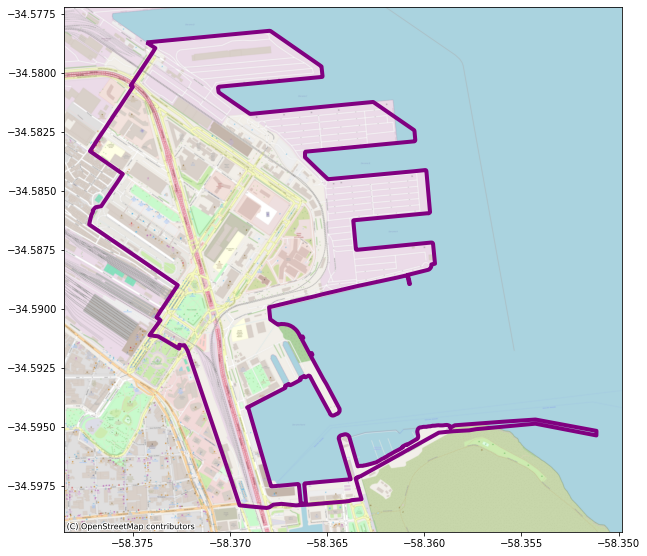

In [5]:
# Crear una figura y un eje
ax = poly_select.plot(figsize=(10, 10), color="none", )

# Agregar el fondo del mapa (usando OpenStreetMap como ejemplo)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=4326, zoom=18)

# Dibujar el contorno exterior del polígono con borde blanco
# poly_geom = poly_select['geometry'].iloc[0]
# x, y = poly_geom.exterior.xy
# ax.plot(x, y, color='white', linewidth=2)

# Agregar el polígono seleccionado al eje
# poly_select.boundary.plot(ax=ax, linewidth=4, linestyle='-', edgecolor='orange', facecolor='none')
poly_select.boundary.plot(ax=ax, linewidth=4, linestyle="-", edgecolor="purple")

# Guardar la imagen resultante
# plt.savefig(f'{valor_a_buscar}.png', dpi=300, bbox_inches='tight')
plt.show()

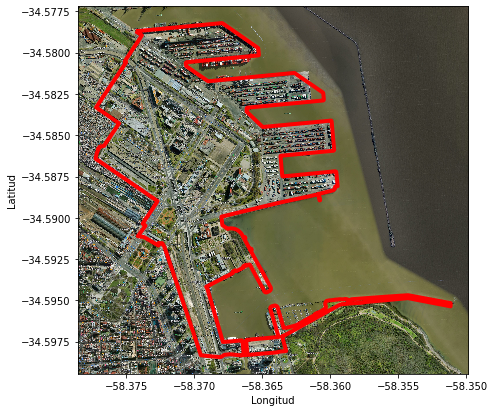

In [6]:
# Crear una figura y un eje
ax = poly_select.plot(figsize=(7, 7), color="none", )

# Agregar el fondo del mapa (usando Google Satellite como ejemplo)
ctx.add_basemap(ax, source='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}', crs=4326, zoom=18, interpolation='none')

# Agregar el polígono seleccionado al eje
poly_select.boundary.plot(ax=ax, linewidth=4, linestyle="-", edgecolor="red")

# Formatear ticks del eje x e y para mostrar valores sin notación científica
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Etiquetas de los ejes
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Guardar la imagen resultante
# plt.savefig(f'{valor_a_buscar}.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
print(poly_select.crs)

EPSG:4326


In [8]:
geoserie_poly = poly_select['geometry'].iloc[0]

In [9]:
points_clip = gpd.clip(poly_select1, geoserie_poly)

/home/eddie/.local/lib/python3.8/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [10]:
points_clip[['COD_2010','geometry']]

,COD_2010,geometry
49705,020010101,"POLYGON ((-58.36801 -34.57821, -58.36798 -34.5..."


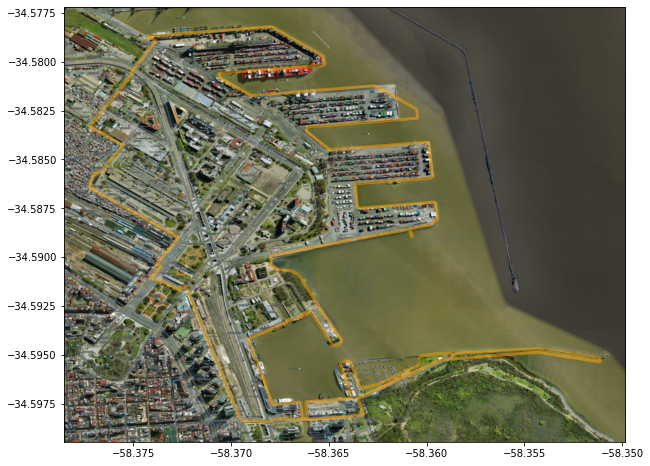

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
points_clip.plot(
    alpha=.5,
    ax=ax,
    color='none',
    edgecolor='orange',
    linewidth=3
)

ctx.add_basemap(ax, source='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}', crs=4326, zoom=18)
plt.show()

In [12]:
bounds = poly_select.geometry.bounds
lon_min = bounds['minx']
lat_min = bounds['miny']
lon_max = bounds['maxx']
lat_max = bounds['maxy']

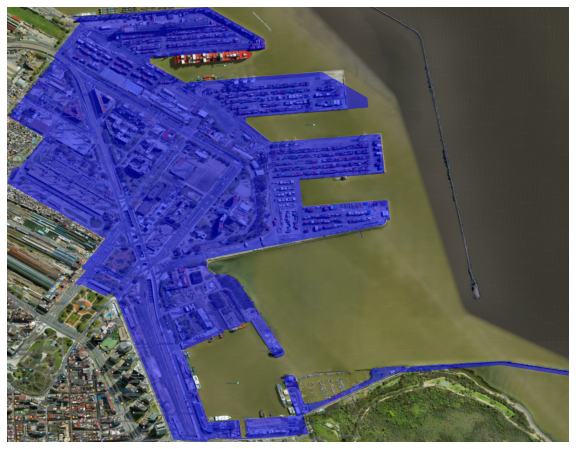

In [13]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white', frameon=False)

basemap_url = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}'

points_clip.plot( 
    ax=ax, 
    color='blue', 
    alpha=0.5
)

# Obtiene los límites del GeoDataFrame
minx, miny, maxx, maxy = points_clip.total_bounds
extent = minx, maxx, miny, maxy
# Agrega el basemap solo dentro del polígono
ctx.add_basemap(ax, source='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}', 
                 crs=points_clip.crs, zoom=18, reset_extent=True )
ax.set_xlim([minx, maxx])
ax.set_ylim([miny, maxy])

# Oculta los valores de los ejes x e y y cualquier otra información
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()

plt.show()

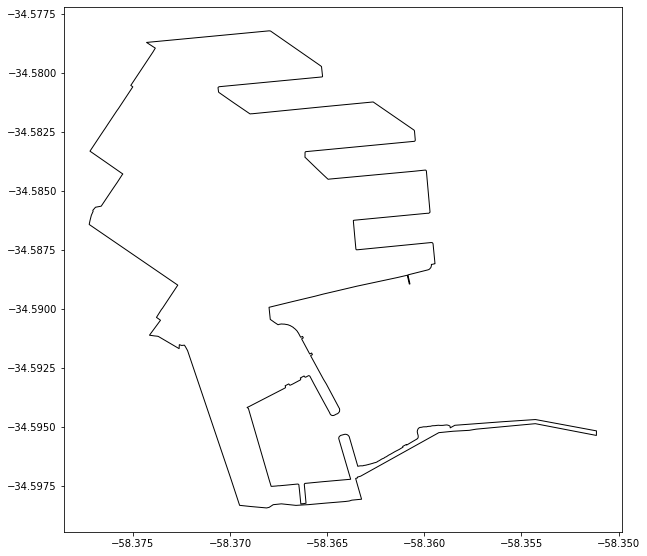

In [18]:
clipped = points_clip.clip(geoserie_poly)
fig, ax = plt.subplots(figsize=(10, 10), frameon=False)
clipped.plot(ax=ax, color='none')
plt.show()
